<a href="https://colab.research.google.com/github/Navya003/MLP/blob/main/LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


1. Import Libraries: Import all the necessary libraries for data manipulation, visualization, and model building.


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

2. Load Datasets: Load the training, actual, and testing datasets.


In [ ]:
# Load the datasets
train_df = pd.read_csv("data_set_ALL_AML_train.csv")
cancer_labels = pd.read_csv("actual.csv")
test_df = pd.read_csv("data_set_ALL_AML_independent.csv")

3. Convert Labels to Numeric: Convert cancer type labels from 'ALL' and 'AML' to numeric values (0 and 1).


In [ ]:
# Convert cancer type to numerical values: ALL = 0, AML = 1
cancer_labels['cancer'] = cancer_labels['cancer'].map({'ALL': 0, 'AML': 1})

4. Remove Irrelevant Columns: Remove columns that contain 'call' as they are not needed for analysis.


In [ ]:
# Remove columns with 'call' in their name
train_cols = [col for col in train_df.columns if 'call' not in col]
test_cols = [col for col in test_df.columns if 'call' not in col]

5. Transpose Data: Transpose the dataframes to switch rows and columns, so genes are columns and patients are rows.


In [ ]:
# Transpose the dataframes to have genes as columns and patients as rows
train_data = train_df[train_cols].set_index('Gene Accession Number').T.reset_index(drop=True)
test_data = test_df[test_cols].set_index('Gene Accession Number').T.reset_index(drop=True)

6. Add Patient Identifiers: Add patient identifiers to the datasets.


In [ ]:
# Add patient identifiers
train_data['patient'] = train_data.index + 1
test_data['patient'] = test_data.index + 1

7. Merge with Labels: Merge the datasets with the actual cancer data to get the labels for each patient.


In [ ]:
# Merge with actual cancer data to get the labels
train_merged = train_data.merge(cancer_labels, left_on='patient', right_on='patient')
test_merged = test_data.merge(cancer_labels, left_on='patient', right_on='patient')

8. Separate Features and Target: Separate the features (gene expressions) and target (cancer type) for both training and testing data.


In [ ]:
# Separate features (X) and target (y) for training and testing
X_train = train_merged.drop(columns=['patient', 'cancer'])
y_train = train_merged['cancer']
X_test = test_merged.drop(columns=['patient', 'cancer'])
y_test = test_merged['cancer']

9. Ensure Numeric Values: Convert all values to numeric, replacing non-numeric values with 0.


In [ ]:
# Ensure all columns are numeric (convert any non-numeric values to 0)
X_train = X_train.apply(pd.to_numeric, errors='coerce').fillna(0)
X_test = X_test.apply(pd.to_numeric, errors='coerce').fillna(0)

10. Setup Logistic Regression: Set up the logistic regression model and use GridSearchCV to find the best hyperparameters.


In [ ]:
# Set up the logistic regression model with GridSearchCV for hyperparameter tuning
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']}
log_reg = LogisticRegression(solver='liblinear')
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=3, scoring='accuracy')

11. Train Model: Train the model using the training data.


In [ ]:
# Train the model using the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

12. Make Predictions: Make predictions on the test set using the best model.


In [ ]:
# Get the best model from grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

13. Evaluate Model: Print the accuracy and classification report to evaluate model performance.


In [ ]:
# Print accuracy and classification report
print(f"Logistic Regression accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(classification_report(y_test, y_pred, target_names=['ALL', 'AML']))

Logistic Regression accuracy: 0.714
              precision    recall  f1-score   support

         ALL       1.00      0.63      0.77        27
         AML       0.44      1.00      0.62         8

    accuracy                           0.71        35
   macro avg       0.72      0.81      0.69        35
weighted avg       0.87      0.71      0.74        35



14. Plot Confusion Matrix: Visualize the confusion matrix to see the performance of the model in classifying the cancer types.

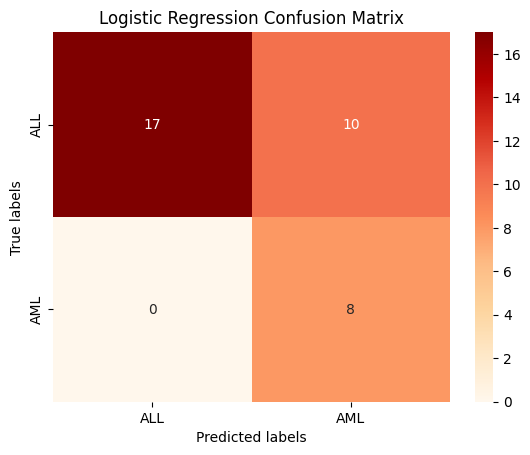

In [ ]:
# Plot confusion matrix to visualize model performance
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='OrRd', xticklabels=['ALL', 'AML'], yticklabels=['ALL', 'AML'])

# Set labels and title for the confusion matrix plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Logistic Regression Confusion Matrix')
plt.show()